In [218]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
font_path = "c:/Windows/fonts/malgun.ttf"
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font_name)
plt.rc('axes', unicode_minus=False)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore")
from matplotlib import cm

In [219]:
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, kstest, shapiro
from scipy.stats import skew
from sklearn.cluster import KMeans

import seaborn as sns
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

import numpy as np
from sklearn.metrics import silhouette_samples


In [220]:
df = pd.read_csv('./final_data_set_v3.csv')

In [221]:
def making_pivot(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['Participants', 'Address', 'Tag', 'Longitude', 'Latitude']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

In [222]:
def making_pivot_ration(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People_Ratio',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['Participants', 'Address', 'Tag', 'Longitude', 'Latitude']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

In [223]:
food = df[df['Category'] == '음식']
# food.to_csv('./food.csv')
food.head(3)

,Unnamed: 0,Attraction,Category,type,Category_Map,Category_Map_v2,Good_Point,Selected_People,Selected_People_Ratio,Participants,Address,Tag,Longitude,Latitude,Image Link
4815,4815,채그로,음식,cafe,시설 및 분위기,시설 및 환경,뷰가 좋아요,146.0,0.252159,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689,https://modo-phinf.pstatic.net/20220808_69/165...
4816,4816,채그로,음식,cafe,시설 및 분위기,분위기,집중하기 좋아요,62.0,0.107081,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689,https://modo-phinf.pstatic.net/20220808_69/165...
4817,4817,채그로,음식,cafe,시설 및 분위기,특별한 목적,읽을만한 책이 많아요,61.0,0.105354,201,서울특별시 마포구 마포대로4다길 31,#독서#마포구가볼만한곳#복합문화시설#북카페#서울#쇼핑#채그로#책#힐링공간,126.944219,37.535689,https://modo-phinf.pstatic.net/20220808_69/165...


# 원본데이터

In [224]:
pivot_food = making_pivot(food)

적절한 클러스터 개수를 찾기 위해 Elbow 기법 활용

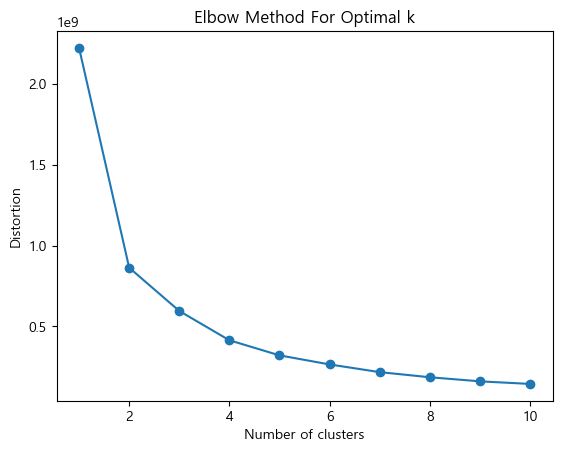

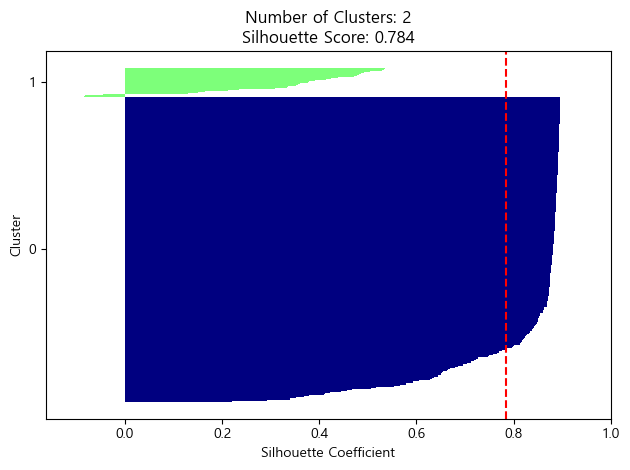

In [225]:
# Elbow
x_features = pivot_food [['가격 및 가치', '서비스','시설 및 분위기', '음식의 속성']].values
distortions = []

# Elbow Method
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=42)
    kmeans_i.fit(x_features)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 점수 구하는 함수 정의
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouette_avg = np.mean(silhouette_values)

    # 그래프 꾸며주는 코드
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(silhouette_avg, 3)}')
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks(np.arange(0, 1.1, 0.2))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()

# 실루엣 시각화 예시
silhouetteviz(2, x_features)

### 원본데이터 군집화 Elbow 기법으로 실루엣 점수 확인
cluster : 2 -> 0.784 
- 군집별 개수의 차이가 너무 큼 409, 40

cluster : 3 -> 0.634 

cluster : 4 -> 0.64 

In [226]:
# cluster 개수 3일때
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
pivot_food['cluster'] = y_labels

# 군집별 개수 확인
pivot_food['cluster'].value_counts()

cluster
0    340
2     78
1     31
Name: count, dtype: int64

# 로그 변환 후 데이터

In [227]:
food_log_pivot = pivot_food.copy()
food_log_pivot.columns

Index(['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants',
       'Address', 'Tag', 'Longitude', 'Latitude', 'cluster'],
      dtype='object')

In [228]:
food_log_pivot['가격 및 가치_log'] = np.log1p(pivot_food['가격 및 가치'])
food_log_pivot['서비스_log'] = np.log1p(pivot_food['서비스'])
food_log_pivot['시설 및 분위기_log'] = np.log1p(pivot_food['시설 및 분위기'])
food_log_pivot['음식의 속성_log'] = np.log1p(pivot_food['음식의 속성'])

food_log_pivot = food_log_pivot[['Attraction','가격 및 가치_log', '서비스_log','시설 및 분위기_log', 
                                 '음식의 속성_log']]

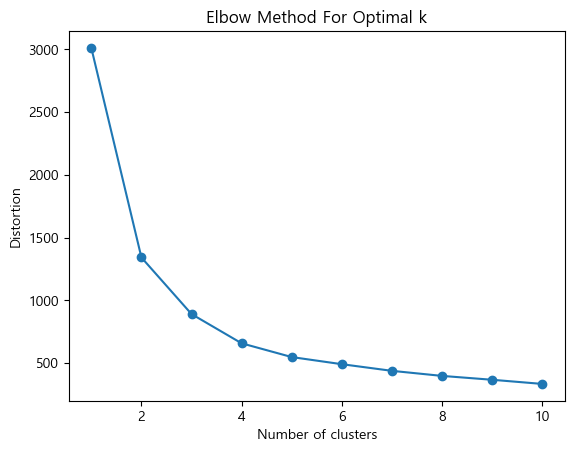

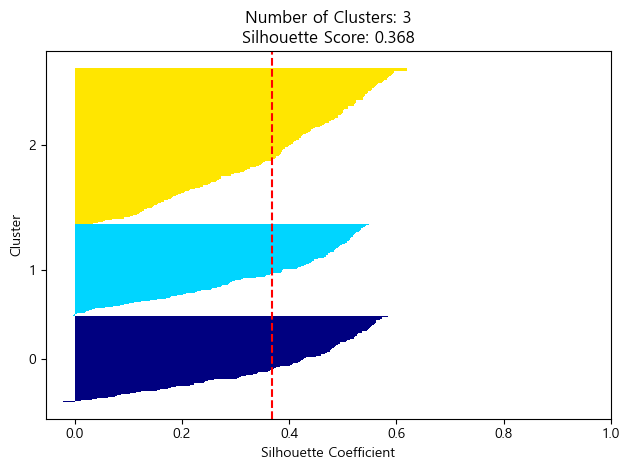

In [229]:
# 필요한 컬럼 추출 및 스케일링

x_features_log = food_log_pivot[['가격 및 가치_log', '서비스_log','시설 및 분위기_log', 
                                 '음식의 속성_log']].values

# Elbow Method
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=42)
    kmeans_i.fit(x_features_log)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 점수 구하는 함수 정의
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouette_avg = np.mean(silhouette_values)

    # 그래프 꾸며주는 코드
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(silhouette_avg, 3)}')
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks(np.arange(0, 1.1, 0.2))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()

# 실루엣 시각화 예시
silhouetteviz(3, x_features_log)

### 로그변환 후 데이터 군집화 Elbow 기법으로 실루엣 점수 확인
- cluster 3 : 0.368 (340,78,31)
- cluster 2 : 0.446 (409, 40)

In [230]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 2 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
food_log_pivot['cluster_2'] = y_labels

# 군집별 개수 확인
food_log_pivot['cluster_2'].value_counts()

cluster_2
0    409
1     40
Name: count, dtype: int64

In [235]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
food_log_pivot['cluster_3'] = y_labels

# 군집별 개수 확인
food_log_pivot['cluster_3'].value_counts()

cluster_3
0    340
2     78
1     31
Name: count, dtype: int64

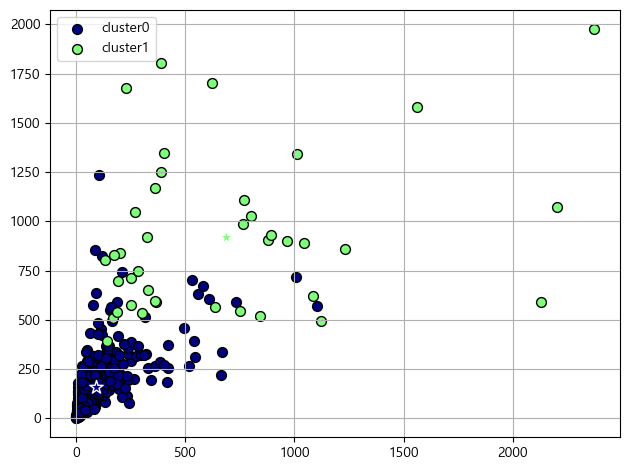

In [236]:
x_features_log = food_log_pivot[['가격 및 가치_log', '서비스_log','시설 및 분위기_log', 
                                 '음식의 속성_log']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
clusterScatter(2, x_features) 

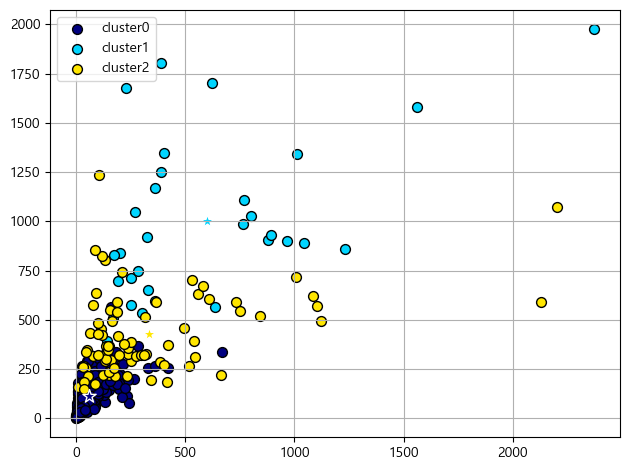

In [237]:
x_features_log = food_log_pivot[['가격 및 가치_log', '서비스_log','시설 및 분위기_log', 
                                 '음식의 속성_log']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
clusterScatter(3, x_features) 

# 군집 라벨링 해주기
군집을 3개로 나눈거 또는 2개로 나눈거

In [238]:
food_log_pivot

,Attraction,가격 및 가치_log,서비스_log,시설 및 분위기_log,음식의 속성_log,cluster_2,cluster_3
0,1940금문,1.945910,3.784190,4.382027,5.351858,0,0
1,63뷔페 파빌리온,7.771910,7.588324,8.868132,8.722254,1,1
2,BK볏짚 우대갈비 장안동본점,4.143135,5.655992,6.313548,6.788972,0,0
3,RSG 성수,0.000000,1.098612,2.890372,2.639057,0,0
4,WANGTHAI,3.465736,5.159055,5.837730,6.342121,0,0
...,...,...,...,...,...,...,...
444,황금정원,5.153292,5.541264,7.327123,7.605890,0,2
445,황생가칼국수,5.780744,6.826545,7.545390,8.616858,1,1
446,황토추어탕,5.416100,5.043425,5.613128,6.621406,0,0
447,희락갈치,6.415097,6.403574,6.265301,8.075894,0,2


In [239]:
food_3 = food_log_pivot[['Attraction', '가격 및 가치_log', '서비스_log','시설 및 분위기_log', '음식의 속성_log','cluster_3']]
food_2 = food_log_pivot[['Attraction', '가격 및 가치_log', '서비스_log','시설 및 분위기_log', '음식의 속성_log','cluster_2']]

In [240]:
food_log_cluster = food_log_pivot[['Attraction','cluster_3','cluster_2']]
food_log_cluster [:5]

,Attraction,cluster_3,cluster_2
0,1940금문,0,0
1,63뷔페 파빌리온,1,1
2,BK볏짚 우대갈비 장안동본점,0,0
3,RSG 성수,0,0
4,WANGTHAI,0,0


In [241]:
extract_food = pd.merge(food,food_log_cluster, on = 'Attraction' )
extract_food = extract_food[['Attraction', 'Category', 'type', 'Category_Map',
       'Good_Point', 'Selected_People', 'Participants','cluster_3', 'cluster_2']]

In [242]:
extract_food

,Attraction,Category,type,Category_Map,Good_Point,Selected_People,Participants,cluster_3,cluster_2
0,채그로,음식,cafe,시설 및 분위기,뷰가 좋아요,146.0,201,0,0
1,채그로,음식,cafe,시설 및 분위기,집중하기 좋아요,62.0,201,0,0
2,채그로,음식,cafe,시설 및 분위기,읽을만한 책이 많아요,61.0,201,0,0
3,채그로,음식,cafe,시설 및 분위기,인테리어가 멋져요,60.0,201,0,0
4,채그로,음식,cafe,음식의 속성,커피가 맛있어요,39.0,201,0,0
...,...,...,...,...,...,...,...,...,...
10489,h450,음식,west,시설 및 분위기,아늑해요,2.0,260,0,0
10490,h450,음식,west,가격 및 가치,메뉴 구성이 알차요,2.0,260,0,0
10491,h450,음식,west,음식의 속성,건강한 맛이에요,2.0,260,0,0
10492,h450,음식,west,음식의 속성,음료가 맛있어요,1.0,260,0,0


In [243]:
def making_pivot(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['type','Participants','cluster_3','cluster_2']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

In [244]:
cluster = making_pivot(extract_food)
cluster.columns

Index(['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'type',
       'Participants', 'cluster_3', 'cluster_2'],
      dtype='object')

In [245]:
cluster_3 = cluster[['Attraction', 'type','가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants','cluster_3']]
cluster_2 = cluster[['Attraction', 'type','가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants','cluster_2']]

In [246]:
# 그룹화하여 각 열의 평균 계산
mean_values = cluster_3.groupby('cluster_3')[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
cluster_3,,,,
0,57.317647,112.661765,311.014706,504.955882
1,598.645161,1002.129032,3967.096774,6562.967742
2,335.987179,425.615385,1235.423077,2507.653846


In [247]:
# 그룹화하여 각 열의 평균 계산
mean_values = cluster_2.groupby('cluster_2')[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
cluster_2,,,,
0,90.163814,160.691932,451.09291,807.826406
1,684.400000,921.150000,3514.77500,6008.325000


# 비율 데이터 사용

In [248]:
def making_pivot_ratio(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People_Ratio',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['Participants','type', 'Address', 'Tag', 'Longitude', 'Latitude']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

In [249]:
ratio_food = making_pivot_ratio(food)
ratio_food.columns

Index(['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants',
       'type', 'Address', 'Tag', 'Longitude', 'Latitude'],
      dtype='object')

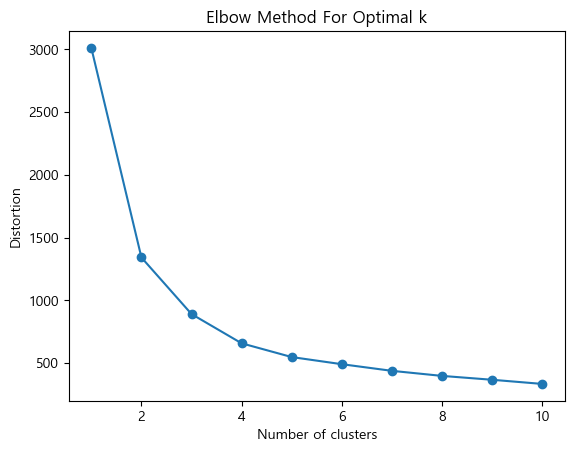

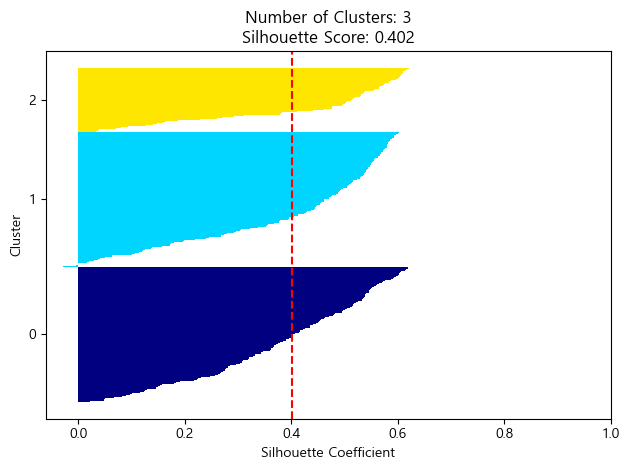

In [250]:
# 필요한 컬럼 추출 및 스케일링

x_features = ratio_food[['가격 및 가치', '서비스','시설 및 분위기', 
                                 '음식의 속성']].values

# Elbow Method
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=42)
    kmeans_i.fit(x_features_log)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 점수 구하는 함수 정의
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouette_avg = np.mean(silhouette_values)

    # 그래프 꾸며주는 코드
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(silhouette_avg, 3)}')
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks(np.arange(0, 1.1, 0.2))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()

# 실루엣 시각화 예시
silhouetteviz(3, x_features)

# 비율데이터 군집화 Elbow 기법으로 실루엣 점수 확인
cluster : 2 -> 0.503 
- 296, 153

cluster : 3 -> 0.402
- 181, 181, 87

In [251]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
ratio_food['cluster_3'] = y_labels

# 군집별 개수 확인
ratio_food['cluster_3'].value_counts()

cluster_3
1    181
0    181
2     87
Name: count, dtype: int64

In [252]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 2 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
ratio_food['cluster_2'] = y_labels

# 군집별 개수 확인
ratio_food['cluster_2'].value_counts()

cluster_2
0    296
1    153
Name: count, dtype: int64

In [253]:
ratio_food.columns

Index(['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants',
       'type', 'Address', 'Tag', 'Longitude', 'Latitude', 'cluster_3',
       'cluster_2'],
      dtype='object')

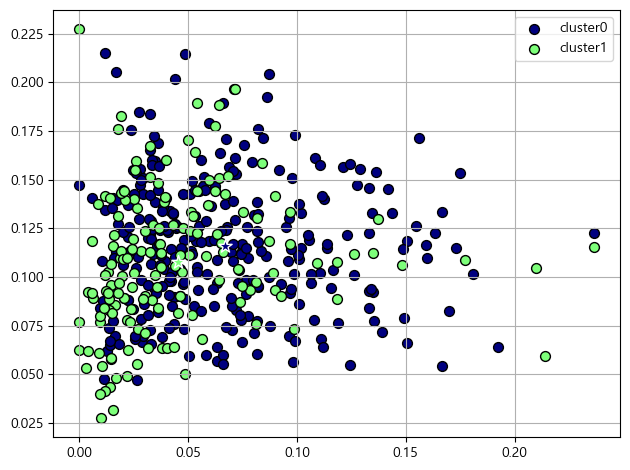

In [254]:
x_features = ratio_food[['가격 및 가치', '서비스','시설 및 분위기', '음식의 속성']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
clusterScatter(2, x_features) 

# 가격및가치, 서비스, 시설및분위기 
비율로 군집화 3차원 그래프

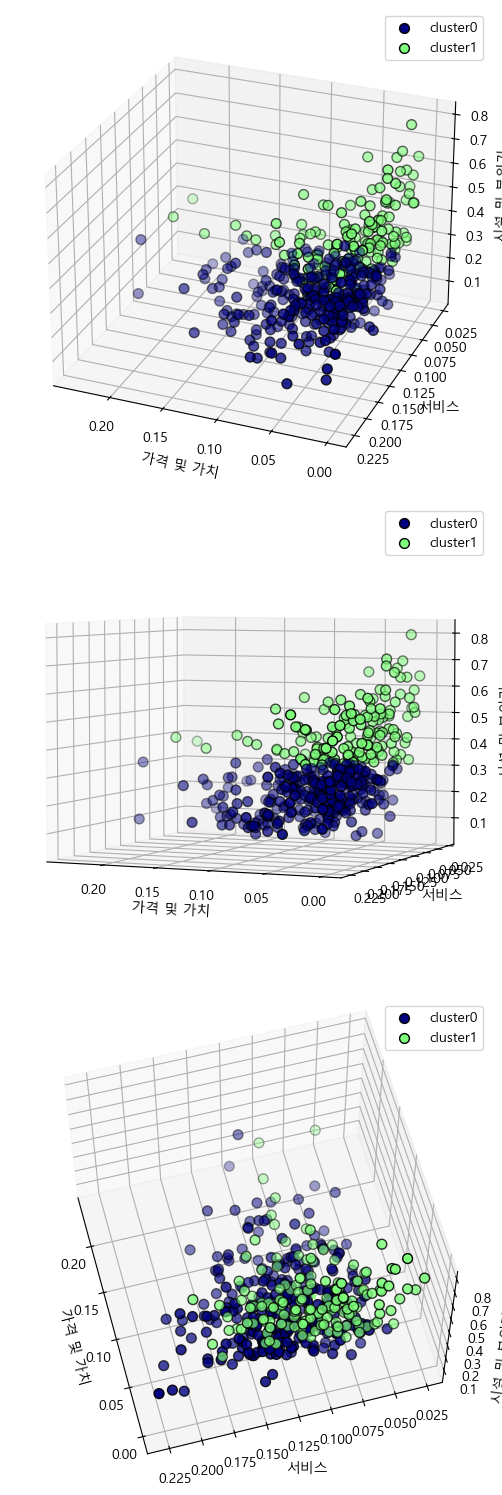

In [255]:
x_features = ratio_food[['가격 및 가치', '서비스','시설 및 분위기']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('가격 및 가치')
        ax.set_ylabel('서비스')
        ax.set_zlabel('시설 및 분위기')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(2, x_features)

# 음식의 속성, 서비스, 시설 및 분위기
비율로 군집화하여 3차원 그래프

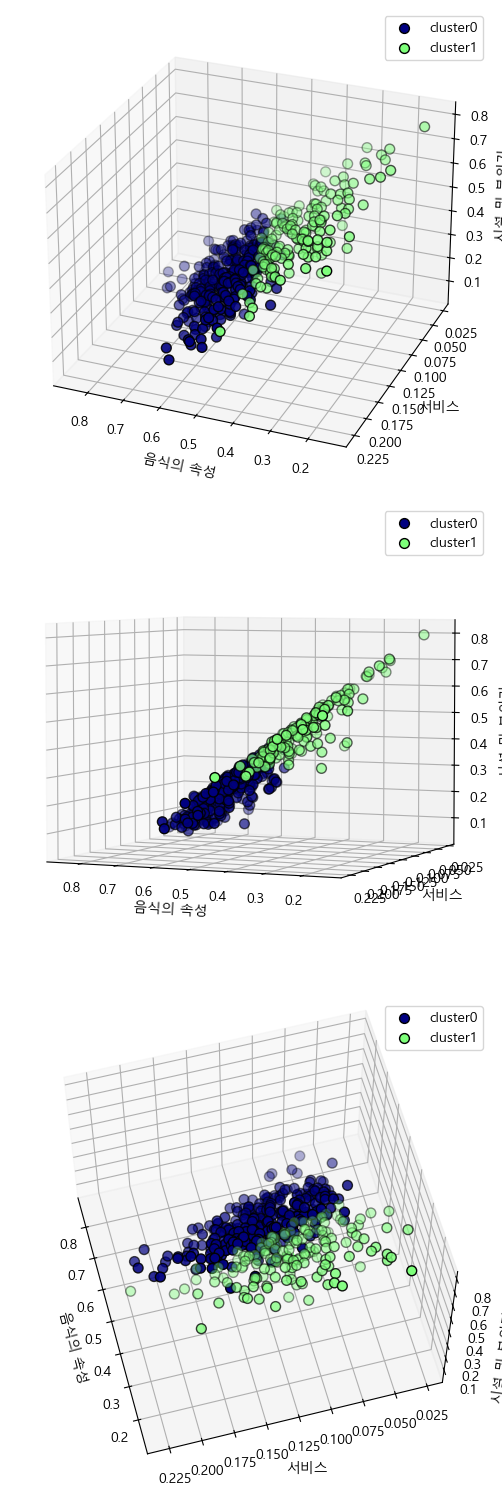

In [296]:

x_features = ratio_food[['음식의 속성', '서비스','시설 및 분위기']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('음식의 속성')
        ax.set_ylabel('서비스')
        ax.set_zlabel('시설 및 분위기')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(2, x_features)

In [297]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 2 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
ratio_food['cluster_2'] = y_labels

# 군집별 개수 확인
ratio_food['cluster_2'].value_counts()

cluster_2
0    296
1    153
Name: count, dtype: int64

In [298]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)
ratio_food['cluster_3'] = y_labels

# 군집별 개수 확인
ratio_food['cluster_3'].value_counts()

cluster_3
0    181
2    181
1     87
Name: count, dtype: int64

In [299]:
ratio_food_clust3 = ratio_food[['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants','type','cluster_3']]
ratio_food_clust2 = ratio_food[['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants','type','cluster_2']]

In [ ]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_food_clust3.groupby('cluster_3')[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
cluster_3,,,,
0,0.055046,0.116680,0.316461,0.511813
1,0.072837,0.115378,0.173977,0.637808
2,0.041534,0.100372,0.513142,0.344952


In [ ]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_food_clust2.groupby('cluster_2')[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
cluster_2,,,,
0,0.066841,0.115779,0.217719,0.599661
1,0.045590,0.107610,0.450771,0.396029


In [ ]:
ratio_food_clust2[ratio_food_clust2['cluster_2']==0]['type'].value_counts()

type
korean      228
cafe         20
chinese      19
japanese     11
etc          10
west          8
Name: count, dtype: int64

In [ ]:
ratio_food_clust2[ratio_food_clust2['cluster_2']==1]['type'].value_counts()

type
korean      58
cafe        35
west        35
chinese     10
etc          9
japanese     6
Name: count, dtype: int64

음식의 속성, 서비스, 시설 및 분위기 -> 3개의 군집

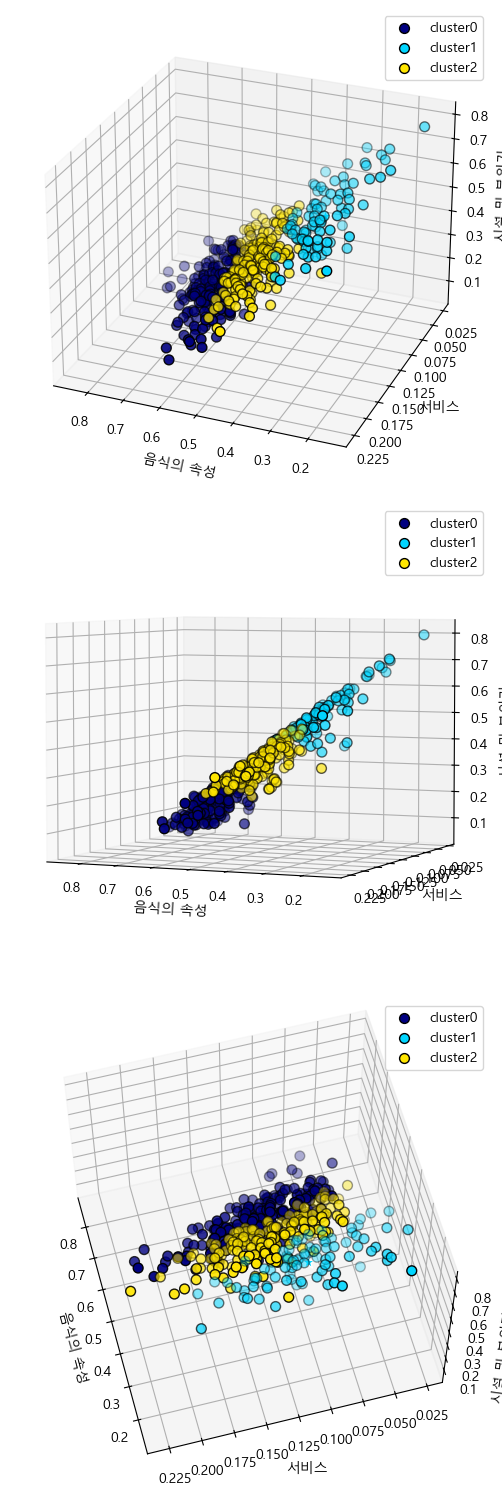

In [302]:
x_features = ratio_food[['음식의 속성', '서비스','시설 및 분위기']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('음식의 속성')
        ax.set_ylabel('서비스')
        ax.set_zlabel('시설 및 분위기')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(3, x_features)

In [303]:
ratio_food_clust3_v1 = ratio_food[['Attraction', '음식의 속성', '서비스','시설 및 분위기', 'Participants','type','cluster_3']]
# ratio_food_clust2 = ratio_food[['Attraction', '가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성', 'Participants','type','cluster_2']]

In [304]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_food_clust3_v1.groupby('cluster_3')[['서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,서비스,시설 및 분위기,음식의 속성
cluster_3,,,
0,0.115550,0.174573,0.638561
1,0.100372,0.513142,0.344952
2,0.116508,0.315865,0.511059


In [259]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_food_clust2.groupby('cluster_2')[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].mean()

mean_values

,가격 및 가치,서비스,시설 및 분위기,음식의 속성
cluster_2,,,,
0,0.066841,0.115779,0.217719,0.599661
1,0.045590,0.107610,0.450771,0.396029


In [260]:
ratio_food_clust2[ratio_food_clust2['cluster_2']==0]['type'].value_counts()

type
korean      228
cafe         20
chinese      19
japanese     11
etc          10
west          8
Name: count, dtype: int64

In [261]:
ratio_food_clust2[ratio_food_clust2['cluster_2']==1]['type'].value_counts()

type
korean      58
cafe        35
west        35
chinese     10
etc          9
japanese     6
Name: count, dtype: int64

# k-medoids 이용 군집화
이상치가 있을 때 더 유용하게 사용


In [262]:
pip install scikit-learn-extra


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


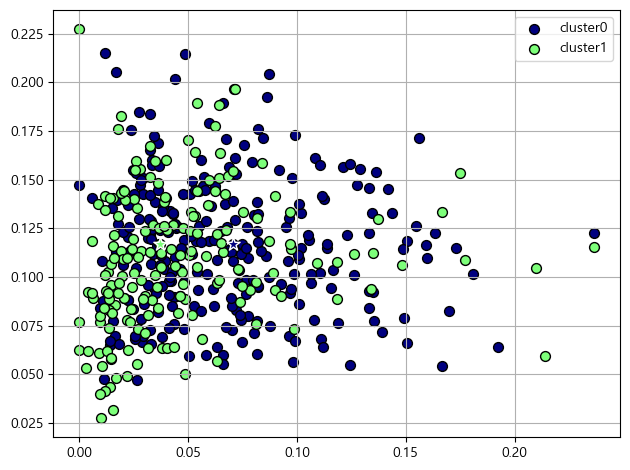

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn_extra.cluster import KMedoids

x_features = ratio_food[['가격 및 가치', '서비스', '시설 및 분위기', '음식의 속성']].values

# K-Medoids 군집 분석 후 시각화하는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmedoids = KMedoids(n_clusters=n_cluster, random_state=42, metric='euclidean')
    y_labels = kmedoids.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels == i, 0], x_features[y_labels == i, 1],
                    marker='o', color=c_color, edgecolor='black', s=50,
                    label='cluster' + str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(x_features[kmedoids.medoid_indices_[i], 0], x_features[kmedoids.medoid_indices_[i], 1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

clusterScatter(2, x_features)

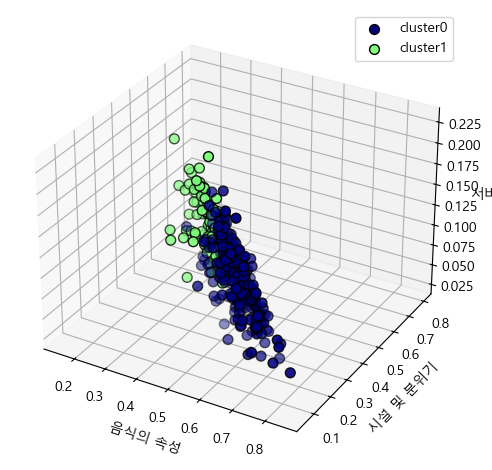

In [264]:
x_features = ratio_food[['음식의 속성', '시설 및 분위기', '서비스']].values

# K-Medoids 군집 분석 후 시각화하는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmedoids = KMedoids(n_clusters=n_cluster, random_state=42, metric='euclidean')
    y_labels = kmedoids.fit_predict(x_features)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        ax.scatter(x_features[y_labels == i, 0], x_features[y_labels == i, 1], x_features[y_labels == i, 2],
                   marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(i)
                   )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        ax.scatter(x_features[kmedoids.medoid_indices_[i], 0], x_features[kmedoids.medoid_indices_[i], 1], x_features[kmedoids.medoid_indices_[i], 2],
                   marker='*', color=c_colors[i], edgecolor='w', s=100)

    ax.set_xlabel('음식의 속성')
    ax.set_ylabel('시설 및 분위기')
    ax.set_zlabel('서비스')
    plt.legend()
    plt.tight_layout()
    plt.show()

# 인터랙티브 모드 활성화
plt.ion()

clusterScatter(2, x_features)

# plt.ioff()를 사용하여 인터랙티브 모드를 비활성화할 수 있습니다.
plt.ioff()

# 관광

원본 댓글 수 데이터

In [265]:
def making_pivot(df):
    pivot_df = df.pivot_table(
        index='Attraction',
        columns='Category_Map',
        values='Selected_People',
        aggfunc='sum',  
        fill_value=0
    )

    first_values = df.groupby('Attraction').first()[['Participants', 'Address', 'Tag', 'Longitude', 'Latitude']]
    pivot_df = pivot_df.reset_index().merge(first_values, on='Attraction', how='left')
    
    return pivot_df

In [266]:
tour = df[df['Category'] == '관광']

In [267]:
pivot_tour = making_pivot(tour)

In [268]:
pivot_tour.columns

Index(['Attraction', '만족도', '매력도', '편의', 'Participants', 'Address', 'Tag',
       'Longitude', 'Latitude'],
      dtype='object')

# 원본데이터 군집화

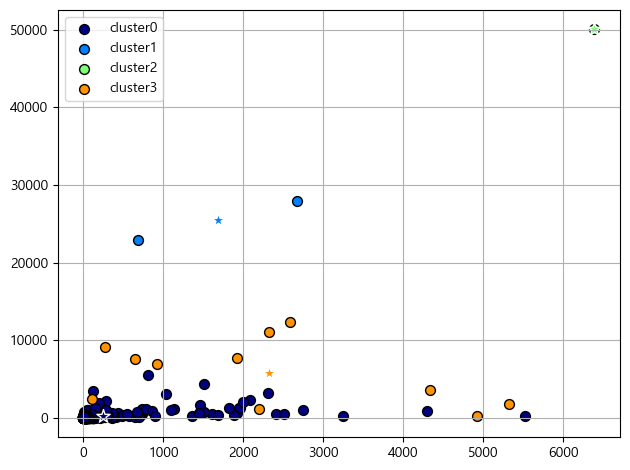

In [269]:
x_features = pivot_tour[['만족도', '매력도', '편의']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_featrues):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i)/n_cluster)
        c_colors.append(c_color)
        # 클러스터 색상 설정

        # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
        plt.scatter(x_features[y_labels ==i, 0], x_features[y_labels ==i, 1],
                    marker ='o', color=c_color, edgecolor='black' , s=50,
                    label='cluster'+str(i)
                    )
        # 각 클러스터의 중심점(centroid) 별(*)로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0],kmeans.cluster_centers_[i,1],
                    marker='*', color=c_colors[i], edgecolor='w', s=100)

    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()
    
clusterScatter(4, x_features) 

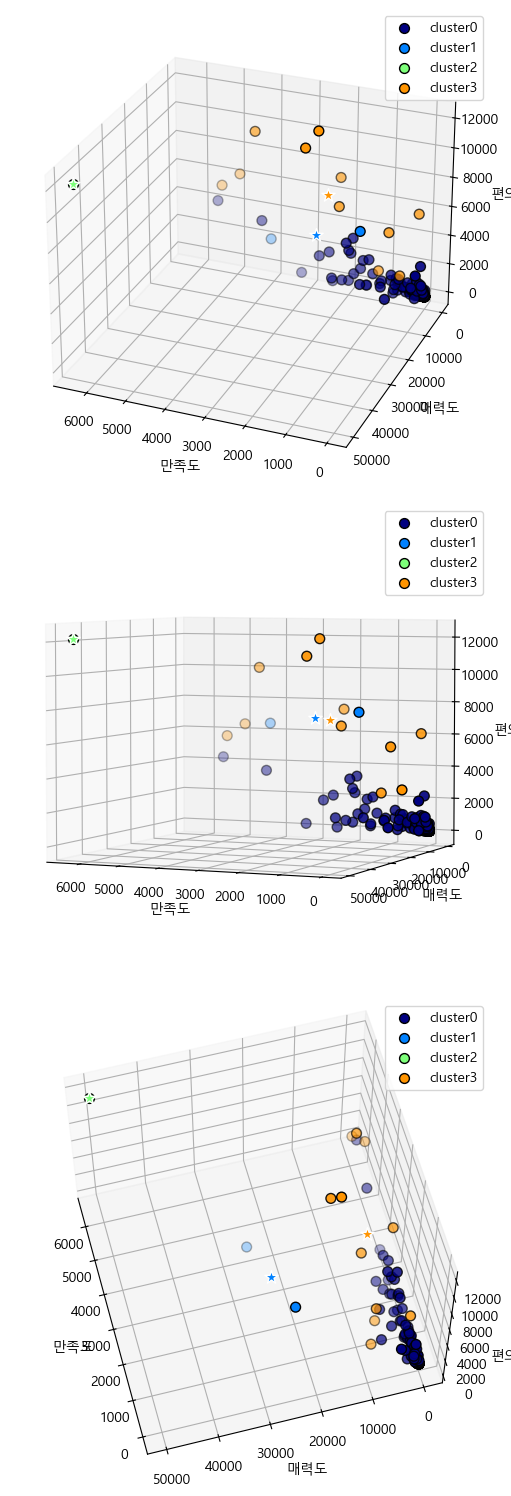

In [270]:
x_features = pivot_tour[['만족도', '매력도', '편의']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('만족도')
        ax.set_ylabel('매력도')
        ax.set_zlabel('편의')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(4, x_features)

# 비율 데이터를 이용한 그래프

In [271]:
ratio_tour = making_pivot_ratio(tour)

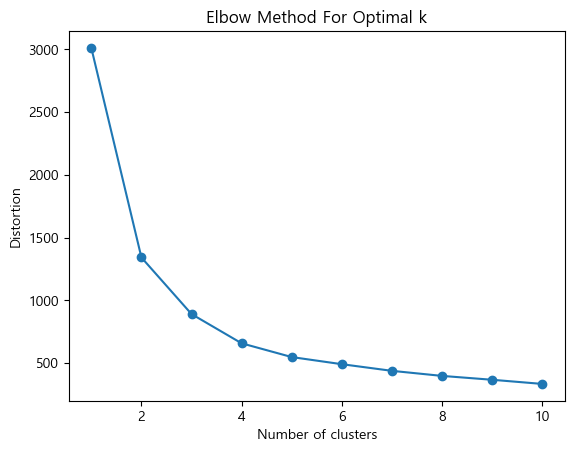

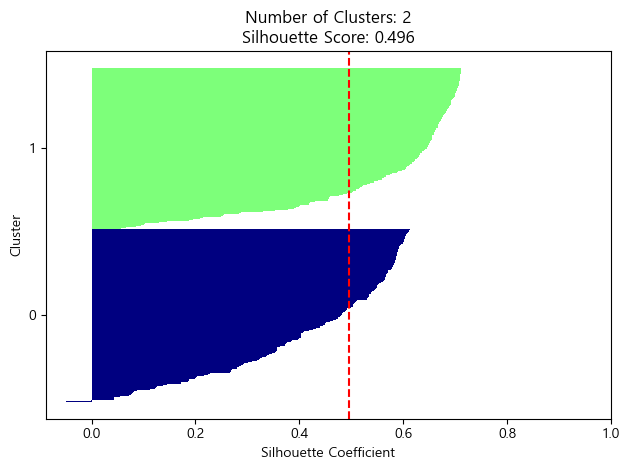

In [272]:
# 필요한 컬럼 추출 및 스케일링

x_features = ratio_tour[['만족도', '매력도', '편의']].values

# Elbow Method
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=42)
    kmeans_i.fit(x_features_log)
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

# 실루엣 점수 구하는 함수 정의
def silhouetteviz(n_cluster, x_features):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)
    silhouette_values = silhouette_samples(x_features, y_labels, metric='euclidean')

    # 초기화
    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouette = silhouette_values[y_labels == c]
        c_silhouette.sort()
        y_ax_upper += len(c_silhouette)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouette)
    silhouette_avg = np.mean(silhouette_values)

    # 그래프 꾸며주는 코드
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title(f'Number of Clusters: {n_cluster}\nSilhouette Score: {round(silhouette_avg, 3)}')
    plt.yticks(y_ticks, range(n_cluster))
    plt.xticks(np.arange(0, 1.1, 0.2))
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette Coefficient')
    plt.tight_layout()
    plt.show()

# 실루엣 시각화 예시
silhouetteviz(2, x_features)

In [273]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 3 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)

ratio_tour['cluster_3'] = y_labels
# 군집별 개수 확인
ratio_tour['cluster_3'].value_counts()

cluster_3
1    143
0    133
2     60
Name: count, dtype: int64

In [274]:
# cluster 개수 지정
kmeans = KMeans(n_clusters = 2 , random_state=42)

# 예측된 cluster 라벨링 해주기
y_labels = kmeans.fit_predict(x_features)

ratio_tour['cluster_2'] = y_labels
# 군집별 개수 확인
ratio_tour['cluster_2'].value_counts()

cluster_2
0    174
1    162
Name: count, dtype: int64

In [275]:
ratio_tour_clust3 = ratio_tour[['Attraction', '만족도', '매력도', '편의', 'Participants','type','cluster_3']]
ratio_tour_clust2 = ratio_tour[['Attraction', '만족도', '매력도', '편의', 'Participants','type','cluster_2']]

In [283]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_tour_clust3.groupby('cluster_3')[['만족도', '매력도', '편의']].mean()

mean_values

,만족도,매력도,편의
cluster_3,,,
0,0.494984,0.281970,0.223046
1,0.062032,0.633465,0.304504
2,0.233224,0.221889,0.544887


In [284]:
# 그룹화하여 각 열의 평균 계산
mean_values = ratio_tour_clust2.groupby('cluster_2')[['만족도', '매력도', '편의']].mean()

mean_values

,만족도,매력도,편의
cluster_2,,,
0,0.452360,0.256362,0.291278
1,0.061644,0.597492,0.340864


In [285]:
ratio_tour_clust2[ratio_tour_clust2['cluster_2']==0]['type'].value_counts()

type
shop_etc                          106
history                            21
experience                         18
culture                             7
theme                               7
history / culture                   3
history / experience / theme        2
history / experience                2
nature                              2
culture / shop_etc                  1
history / experience / culture      1
experience / shop_etc               1
nature / history                    1
experience / culture                1
history / shop_etc                  1
Name: count, dtype: int64

In [286]:
ratio_tour_clust2[ratio_tour_clust2['cluster_2']==1]['type'].value_counts()

type
nature                         68
history                        44
shop_etc                       11
theme                          10
experience                      9
culture                         4
nature / theme                  4
nature / experience             3
nature / history                3
experience / theme              2
history / shop_etc              1
nature / history / shop_etc     1
history / theme                 1
history / experience            1
Name: count, dtype: int64

# 비율데이터 군집화 Elbow 기법으로 실루엣 점수 확인 - 관광
cluster : 2 -> 0.496 

cluster : 3 -> 0.454

cluster : 4 -> 0.445

군집 2개

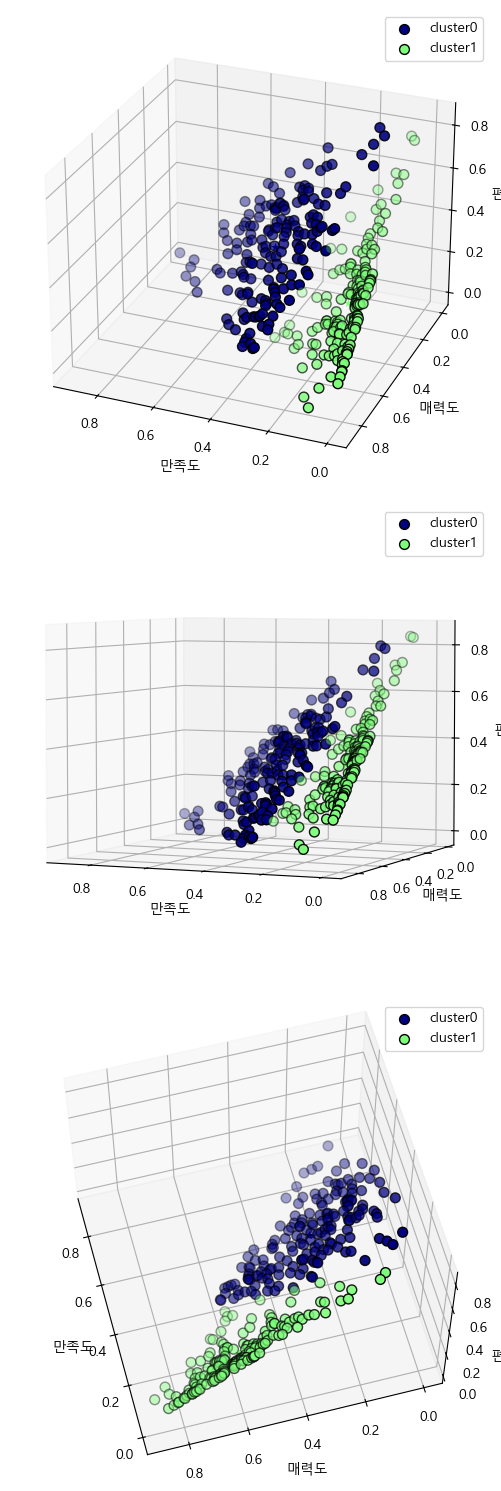

In [290]:
x_features = ratio_tour[['만족도', '매력도', '편의']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('만족도')
        ax.set_ylabel('매력도')
        ax.set_zlabel('편의')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(2, x_features)

군집 3개

cluster 0 : 높은 만족도
cluster 1 : 높은 매력도
cluster 2 : 

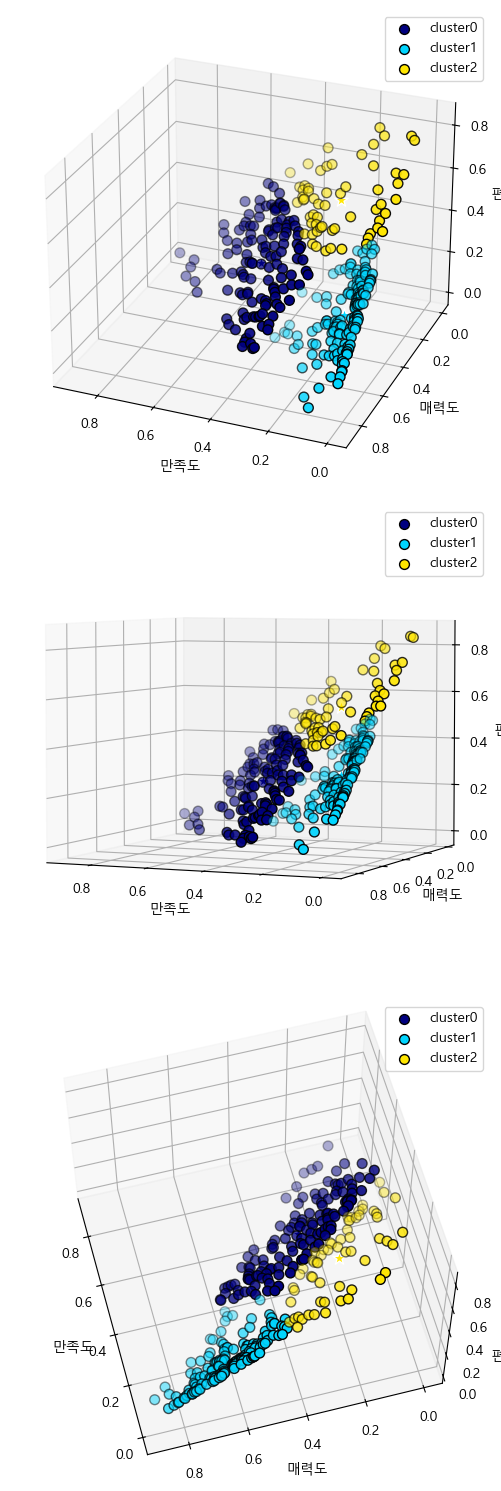

In [291]:
x_features = ratio_tour[['만족도', '매력도', '편의']].values

# 군집 분석 후 시각화해주는 함수
def clusterScatter(n_cluster, x_features):
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    y_labels = kmeans.fit_predict(x_features)

    fig = plt.figure(figsize=(10, 15))  # 3행 1열 형식의 서브플롯 생성

    for i in range(3):
        ax = fig.add_subplot(3, 1, i + 1, projection='3d')  # 서브플롯 추가
        for j in range(n_cluster):
            c_color = cm.jet(float(j) / n_cluster)
            c_colors.append(c_color)
            # 클러스터 색상 설정

            # cluster 내 데이터 분포를 표현, centroid 동그라미로 시각화
            ax.scatter(x_features[y_labels == j, 0], x_features[y_labels == j, 1], x_features[y_labels == j, 2],
                       marker='o', color=c_color, edgecolor='black', s=50, label='cluster' + str(j))
            # 각 클러스터의 중심점(centroid) 별(*)로 표시
            ax.scatter(kmeans.cluster_centers_[j, 0], kmeans.cluster_centers_[j, 1], kmeans.cluster_centers_[j, 2],
                       marker='*', color=c_colors[j], edgecolor='w', s=100)

        ax.set_xlabel('만족도')
        ax.set_ylabel('매력도')
        ax.set_zlabel('편의')
        ax.legend()
        ax.grid()
        
        # 시각화를 조정합니다.
        if i == 0:
            ax.view_init(elev=27, azim=112)
        elif i == 1:
            ax.view_init(elev=4, azim=114)
        elif i == 2:
            ax.view_init(elev=60, azim=165)

    plt.tight_layout()
    plt.show()

clusterScatter(3, x_features)